# Prepare Dataset

In [1]:
import pandas as pd
df = pd.read_csv('ForestDataset.csv',encoding='cp1252')
df.head()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,No
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,No
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,No
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,No
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,No


In [2]:
df.tail()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
144,23,6,2012,33,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,No
145,24,6,2012,35,68,16,0.0,85.3,10.0,17.0,4.9,9.9,5.3,Yes
146,25,6,2012,34,70,16,0.0,86.0,12.8,25.6,5.4,12.7,6.7,Yes
147,26,6,2012,36,62,16,0.0,87.8,16.5,34.5,7.0,16.4,9.5,Yes
148,27,6,2012,36,55,15,0.0,89.1,20.9,43.3,8.0,20.8,12.0,Yes


In [3]:
df.shape

(149, 14)

In [4]:
df[df['Target'] == 'No'].head()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,No
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,No
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,No
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,No
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,No


In [5]:
df[df['Target'] == 'Yes'].head()

,Day,Month,Year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,Yes
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,Yes
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,Yes
10,11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,Yes
11,12,6,2012,26,81,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1,Yes


# Data Visualization

In [6]:
df0 = df[df['Target'] == 'No']
df1 = df[df['Target'] == 'Yes']

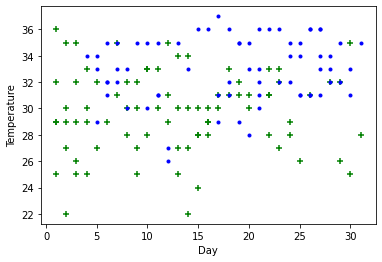

In [7]:
import matplotlib.pyplot as plt
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.scatter(df0['Day'], df0['Temperature'], color="green", marker="+")
plt.scatter(df1['Day'], df1['Temperature'], color="blue", marker=".")

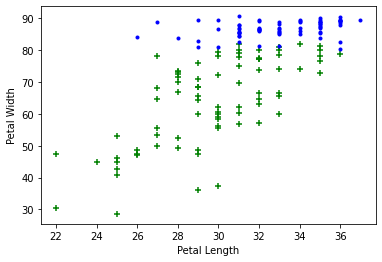

In [8]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['Temperature'], df0['FFMC'], color="green", marker="+")
plt.scatter(df1['Temperature'], df1['FFMC'], color="blue", marker=".")

# Make Training and Testing Dataset

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(['Target'], axis = 'columns')
#X = df.drop(['Target'], axis = 'columns')
Y = df.Target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 1)

In [10]:
len(X_train)

119

In [11]:
len(X_test)

30

# Apply Bayesian Method

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [13]:
model.fit(X_train,Y_train)

GaussianNB()

In [14]:
model.score(X_test, Y_test)

0.9

In [15]:
Y_test[:10]

145    Yes
89     Yes
54     Yes
77     Yes
84     Yes
105     No
91      No
53      No
44      No
59     Yes
Name: Target, dtype: object

In [16]:
model.predict(X_test[:10])

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes'],
      dtype='<U3')

In [17]:
model.predict_proba(X_test[:10])

array([[5.79707166e-011, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.57265794e-021, 1.00000000e+000],
       [2.32841580e-081, 1.00000000e+000],
       [7.60800839e-175, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [9.99999989e-001, 1.05878648e-008],
       [1.00000000e+000, 1.64975111e-033],
       [1.29240661e-057, 1.00000000e+000]])

# Visualize Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)

Text(42.0, 0.5, 'Truth')

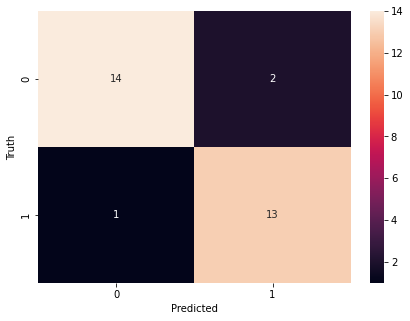

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Classifiation Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

          No       0.93      0.88      0.90        16
         Yes       0.87      0.93      0.90        14

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

